# Employee Exit Survey Analysis

We will analyze the exit surveys from employees and try to determine the reason why they decide to leave.  Specifically, we want to know the nature of the dissatisfaction.

Our project stakeholders need the following questions answered regarding employee exit interviews:
* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

For our sample, we are using exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.  The source of the data can be found here: [TAFE](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) and [DETE](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey).

We are interested in the following columns in regards to the DETE dataset:
* ID : uniquely identifies the participant of the survey
* SeparationType : reason why the person's employment ended
* Cease Date : year or month the person's employment ended
* DETE Start Date : year the person began employment with the DETE

We are interested in the following columns in regards to the TAFE dataset:
* Record ID : uniquely identifies the participant of the survey
* Reason for ceasing employment : reason why the person's employment ended
* LengthofServiceOverall. Overall Length of Service at Institute (in years) : length of person's employment (in years)

Let's begin this analysis by importing the proper libraries and store the dataset in variables:

In [1]:
import pandas as pd
import numpy as np

dete_survey = pd.read_csv("dete_survey.csv")
tafe_survey = pd.read_csv("tafe_survey.csv")

Let's do some initial analysis of the DETE data:

In [2]:
dete_survey.info()
dete_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


Now, lets do some initial analysis of the TAFE data:

In [3]:
tafe_survey.info()
tafe_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


It seems there is a a lot of similar fields with different names in each database.  And there are some values such as the DETE Start Date which null values have the value "Not Stated."  Let's correct some of these issues if we are going to combine both datasets into one.

Let's start by replacing the "Not Stated" values as "NaN" to indicate to pandas that this value is "null."

In [4]:
dete_survey = pd.read_csv("dete_survey.csv", na_values=["Not Stated"])
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


Let's drop some frames in our datasets that we won't use in our analysis, to simplify analysis:

In [5]:
dete_survey_updated = dete_survey.drop(columns=dete_survey.columns[28:49], axis=1)

dete_survey_updated.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Work life balance,Workload,None of the above,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [6]:
tafe_survey_updated = tafe_survey.drop(columns=tafe_survey.columns[17:66], axis=1)

tafe_survey_updated.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


We are dropping these columns because they aren't pertinent to our analysis of employees exiting due to dissatisfaction.

## Renaming Columns

Because we want to combine these two datasets into one.  We need to have common column names for what is essentially the same data.

Let's start by changing all of the DETE column names to lower case:

In [7]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(" ", "_")
print(dete_survey_updated.columns)

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')


### Changing TAFE Column Names

Let's get a side by side analysis of the column names for DETE and TAFE and try to figure out a common name between the two datasets:

| dete_survey | tafe_survey | Definition |
|-------------|-------------|------------|
| ID          | Record ID   | Identify the participant of the survey |
| SeparationType | Reason for ceasing employment | Reason why the participant's employment ended |
| Cease Date | CESSATION YEAR | Year or month the participant's employment ended |
| DETE Start Date |     | Year the participant began employment with the DETE |
|     | LengthofServiceOverall. Overall Length of Service at Institute (in years) | Length of participant's employment in years |
| Age | CurrentAge.Current Age | Age of the participant |
| Gender | Gender. What is your Gender? | Gender of the participant |

Based on the above table, we can begin to standardize column names by changing the column names of the TAFE dataset:

In [8]:
tafe_columns = {
    "Record ID" : "id",
    "CESSATION YEAR" : "cease_date",
    "Reason for ceasing employment": "separationtype",
    "Gender. What is your Gender?" : "gender",
    "Employment Type. Employment Type" : "employment_status",
    "Classification. Classification" : "position",
    "LengthofServiceOverall. Overall Length of Service at Institute (in years)" : "institute_service",
    "LengthofServiceCurrent. Length of Service at current workplace (in years)" : "role_service"
}

tafe_survey_updated = tafe_survey_updated.rename(columns=tafe_columns)

In [9]:
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [10]:
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,CurrentAge. Current Age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


laksdjf

## Filter Dataset by Separationtype

In this analysis, we are only interested in employees who have resigned.  To do this, we should filter out any employees who separated from the organization for reasons other than a resignation.

The first step in this process is to examine what values under separationtype is stored in the dataset:

In [11]:
dete_survey_updated["separationtype"].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [12]:
tafe_survey_updated["separationtype"].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

It looks like the DETE dataset contains three values under resignation (Resignation-Other reasons, Resignations-Other employer, Resignation-Move overseas/interstate).  Next we'll copy the resignation records to dete_resignations and tafe_resignations:

In [13]:
dete_resignations = dete_survey_updated[dete_survey_updated["separationtype"].isin(["Resignation-Other reasons", "Resignations-Other employer", "Resignation-Move overseas/interstate"])].copy()
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN
12,13,Resignation-Other reasons,2012,1998.0,1998.0,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN


In [14]:
tafe_resignations = tafe_survey_updated[tafe_survey_updated["separationtype"] == "Resignation"]
tafe_resignations.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,CurrentAge. Current Age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4


asdfdfasdfasdf

## Verifying Start and End Employment Dates

It's important to verify the dates in our datasets make sense.  We'll verifiy that the cease_date is greater than the start_date.  For the purpose of our analysis, we are only interested in the year in which the resignation occurred, with respepct to the DETE data, to normalize it with the TAFE data.  Let's' examine the cease_date in dete_resignations.

In [15]:
dete_resignations["cease_date"].value_counts().sort_index(ascending=False)

2013       56
2012       87
2010        1
12/2013    12
11/2013     5
10/2013     5
09/2013     9
09/2010     1
08/2013     4
07/2013     7
07/2012     1
06/2013    12
05/2013     2
05/2012     2
01/2014     9
Name: cease_date, dtype: int64

It seems the DETE's cease_date field contains some inconsistent values.  Some values are just the year and most include the month and year.  To normalize our data for this analysis, we are going to store only the year of resignation.  And to make it easier to do comparisons with the other date fields, we are also converting this field to a floating point datatype.

In [16]:
#dete_resignations["cease_date"].str[-4:].astype(float).value_counts().sort_index(ascending=False)
dete_resignations["cease_date"] = dete_resignations["cease_date"].str[-4:].astype(float)
dete_resignations["cease_date"].value_counts().sort_index(ascending=False)

2014.0      9
2013.0    112
2012.0     90
2010.0      2
Name: cease_date, dtype: int64

In [17]:
dete_resignations["dete_start_date"].value_counts().sort_index(ascending=False)
#dete_resignations.boxplot(column=["dete_start_date"])

2013.0    10
2012.0    14
2011.0    18
2010.0    13
2009.0    11
2008.0    14
2007.0    12
2006.0    10
2005.0     9
2004.0    10
2003.0     3
2002.0     3
2001.0     1
2000.0     7
1999.0     6
1998.0     5
1997.0     3
1996.0     5
1995.0     3
1994.0     4
1993.0     5
1992.0     5
1991.0     3
1990.0     3
1989.0     2
1988.0     1
1987.0     1
1986.0     2
1985.0     1
1984.0     1
1983.0     2
1980.0     5
1976.0     2
1974.0     2
1973.0     1
1972.0     1
1971.0     1
1963.0     1
Name: dete_start_date, dtype: int64

In [18]:
tafe_resignations["cease_date"].value_counts().sort_index(ascending=False)

2013.0     55
2012.0     94
2011.0    116
2010.0     68
2009.0      2
Name: cease_date, dtype: int64

It looks like none of the values in the cease_date or dete_start_date fields looks out of the ordinary

## Compute Length of Service

As a reminder, our client wants to know if the length of employment is a factor in resigning.  The TAFE dataset has a field called institute_service that contains the number of years the employee worked there.  However, for the DETE dataset, we need to calculate the number of years the employee worked there by subtracting the dete_start_date from the cease_date.  We'll store this value in a new field called institute_service:

In [19]:
dete_resignations["institute_service"] = dete_resignations["cease_date"] - dete_resignations["dete_start_date"]
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0
12,13,Resignation-Other reasons,2012.0,1998.0,1998.0,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,...,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,14.0


this is done

In [20]:
tafe_resignations["institute_service"].value_counts(dropna=False)

Less than 1 year      73
1-2                   64
3-4                   63
NaN                   50
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: institute_service, dtype: int64

## Determine How an Employee is Dissatisfied

Now we need to develop a set of criteria that indicates whether an employee resigned due to dissatisfaction.

For the TAFE survey, we'll consider the following fields:
* Contributing Factors. Dissatisfaction
* Contributing Factors. Job Dissatisfaction

For the DETE survey, we'll consider the following fields:
* job_dissatisfaction
* dissatisfaction_with_the_department
* physical_work_environment
* lack_of_recognition
* lack_of_job_security
* work_location
* employment_conditions
* work_life_balance
* workload

If an employee indicates that any of the factors stated above contributed to their resignation, we'll mark them as dissatisfied in a new field.

Let's first examine the values in the Contributing Factors. Dissatisfaction and Contributing Factors. Job Dissatisfaction fields in the TAFE dataset:

In [21]:
tafe_resignations["Contributing Factors. Dissatisfaction"].value_counts(dropna=False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [22]:
tafe_resignations["Contributing Factors. Job Dissatisfaction"].value_counts(dropna=False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

Now that we know all the values in this field, we can start to normalize the data for our needs.  We'll convert the value of "-" to False.  If the value is "NaN", then the value will stay "NaN."  For any other value, we'll convert the value to True.

In [23]:
def update_vals(stringValue):
    if stringValue == "NaN":
        return np.nan
    elif stringValue == "-":
        return False
    else:
        return True

tafe_resignations_up = tafe_resignations.copy()
tafe_resignations_up["dissatisfied"] = tafe_resignations[["Contributing Factors. Dissatisfaction", "Contributing Factors. Job Dissatisfaction"]].applymap(update_vals).any(axis=1, skipna=False)

tafe_resignations_up.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,CurrentAge. Current Age,employment_status,position,institute_service,role_service,dissatisfied
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN,False
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4,False
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10,False
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4,False
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4,False


In [24]:
dete_resign_fields = [
    "job_dissatisfaction",
    "dissatisfaction_with_the_department",
    "physical_work_environment",
    "lack_of_recognition",
    "lack_of_job_security",
    "work_location",
    "employment_conditions",
    "work_life_balance",
    "workload"
]

dete_resignations_up = dete_resignations.copy()
dete_resignations_up["dissatisfied"] = dete_resignations[dete_resign_fields].any(axis=1, skipna=False)

dete_resignations_up.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service,dissatisfied
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0,False
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0,True
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0,False
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0,False
12,13,Resignation-Other reasons,2012.0,1998.0,1998.0,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,...,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,14.0,False


explaination

## Combining the DETE and TAFE Datasets

We are almost ready to combine the two datasets to perform our analysis.

To distinguish the source of the data, we are going to add a column called institute to indicate if the data came from DETE or TAFE.

In [25]:
dete_resignations_up["institute"] = "DETE"
tafe_resignations_up["institute"] = "TAFE"

combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

# Verify the number of non null values in each column.
combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               5
nesb                                                     6
disability                                               8
business_unit                                           19
classification                                         107
region                                                 187
role_start_date                                        189
dete_start_date                                        200
age                                                    215
employment_conditions                                  220
ill_health                                             220
interpersonal_conflicts                                220
job_dissatisfaction                                    220
maternity/family                                       220
lack_of_recognition                                    2

In [26]:
# Drop columns with less than 400 non null values
combined_updated = combined.dropna(thresh=400, axis=1).copy()
combined_updated.head()

,cease_date,dissatisfied,employment_status,gender,id,institute,institute_service,position,separationtype
0,2012.0,False,Permanent Full-time,Female,4.0,DETE,7,Teacher,Resignation-Other reasons
1,2012.0,True,Permanent Full-time,Female,6.0,DETE,18,Guidance Officer,Resignation-Other reasons
2,2012.0,False,Permanent Full-time,Female,9.0,DETE,3,Teacher,Resignation-Other reasons
3,2012.0,False,Permanent Full-time,Male,12.0,DETE,3,Teacher,Resignation-Move overseas/interstate
4,2012.0,False,Permanent Full-time,Female,13.0,DETE,14,Teacher,Resignation-Other reasons


explain

## Clean the Service Column

Let's take a closer look at the institute_service column which describes the number of years of service.

In [27]:
combined_updated["institute_service"].value_counts(dropna=False)

NaN                   77
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
7-10                  21
1.0                   19
3.0                   18
5.0                   15
0.0                   15
6.0                   11
More than 20 years    10
7.0                    9
9.0                    9
4.0                    9
2.0                    8
13.0                   7
8.0                    6
17.0                   5
15.0                   5
14.0                   5
20.0                   5
18.0                   4
22.0                   4
10.0                   4
21.0                   3
32.0                   3
16.0                   3
12.0                   2
11.0                   2
19.0                   2
23.0                   2
24.0                   2
36.0                   2
39.0                   2
41.0                   1
25.0                   1
26.0                   1
27.0                   1


It looks like we have a range of values as well as a specific number of years of services mixed in the service_institute column data.  We need a way to combine this data so that it works with all values stored in the dataset.

To be able to sufficiently analyze this data, we'll convert these values into categories.  We'll base our analysis on [this article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage), which argues that understanding an employee's needs according to career stage instead of age is more effective.

We'll define the categories as follows:
* New : less than 3 years at a company
* Experienced : 3-6 years at a company
* Established : 7-10 years at a company
* Veteran : 11 or more years at a company

Let's place the values of institute_service into categories:

In [28]:
combined_updated["institute_service_up"] = combined_updated["institute_service"].astype("str").str.extract(r"(\d+)", expand=False)
combined_updated["institute_service_up"] = combined_updated["institute_service_up"].astype("float")
combined_updated["institute_service_up"].value_counts(dropna=False)

 1.0     156
 3.0      81
NaN       77
 5.0      48
 7.0      30
 11.0     28
 0.0      15
 20.0     15
 6.0      11
 4.0       9
 9.0       9
 2.0       8
 13.0      7
 8.0       6
 14.0      5
 15.0      5
 17.0      5
 22.0      4
 10.0      4
 18.0      4
 21.0      3
 32.0      3
 16.0      3
 12.0      2
 23.0      2
 39.0      2
 24.0      2
 19.0      2
 36.0      2
 31.0      1
 38.0      1
 34.0      1
 33.0      1
 49.0      1
 41.0      1
 28.0      1
 30.0      1
 27.0      1
 42.0      1
 25.0      1
 26.0      1
Name: institute_service_up, dtype: int64

Now that we converted the values to just a number, we can to place these values into categories:

In [29]:
def ConvertToCategory(value):
    if pd.isnull(value):
        return np.nan
    elif value > 11.0:
        return "Veteran"
    elif 7.0 <= value < 11.0:
        return "Established"
    elif 3.0 <= value < 7.0:
        return "Experienced"
    else:
        return "New"

combined_updated["service_cat"] = combined_updated["institute_service_up"].apply(ConvertToCategory)
combined_updated["service_cat"].value_counts(dropna=False)

New            207
Experienced    149
Veteran         78
NaN             77
Established     49
Name: service_cat, dtype: int64

explain

## Clean Up the Dissatisfied Column

klajsdf

In [31]:
combined_updated["dissatisfied"].value_counts(dropna=False)

False    353
True     207
Name: dissatisfied, dtype: int64

In [32]:
# Replace the missing values in with the most frequent value, False
combined_updated["dissatisfied"] = combined_updated["dissatisfied"].fillna(False)

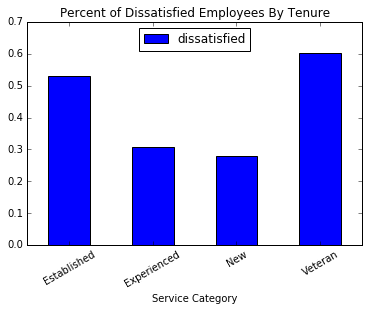

In [46]:
%matplotlib inline
pct_nothappy = combined_updated.pivot_table(index=["service_cat"],values=["dissatisfied"])

ax = pct_nothappy.plot(kind="bar", rot=30, title="Percent of Dissatisfied Employees By Tenure")
ax.legend(loc="upper center")
ax.set_xlabel("Service Category")


explain/conclusion